In [1]:
# https://github.com/tqbl/dcase2018_task2/blob/master/task2/convnet.py
import keras.backend as K
from keras.layers import BatchNormalization
from keras.layers import Bidirectional
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Input
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling1D
from keras.layers import GlobalAveragePooling2D
from keras.models import Model

def vgg13(input_shape, n_classes):
    """Create a VGG13-style model.
    Args:
        input_shape (tuple): Shape of the input tensor.
        n_classes (int): Number of classes for classification.
    Returns:
        A Keras model of the VGG13 architecture.
    """
    input_tensor = Input(shape=input_shape, name='input_tensor')

    x = _conv_block(input_tensor, n_filters=64)
    x = _conv_block(x, n_filters=128)
    x = _conv_block(x, n_filters=256)
    x = _conv_block(x, n_filters=512)
    x = _conv_block(x, n_filters=512)

    x = GlobalAveragePooling2D()(x)

    x = Dense(n_classes, activation='sigmoid')(x)
    return Model(input_tensor, x, name='vgg13')

def _conv_block(x, n_filters, kernel_size=(3, 3), pool_size=(2, 2), **kwargs):
    """Apply two batch-normalized convolutions followed by max pooling.
    Args:
        x (tensor): Input tensor.
        n_filters (int): Number of convolution filters.
        kernel_size (int or tuple): Convolution kernel size.
        pool_size (int or tuple): Max pooling parameter.
        kwargs: Other keyword arguments.
    Returns:
        tensor: The output tensor.
    """
    x = _conv_bn(x, n_filters, kernel_size, **kwargs)
    x = _conv_bn(x, n_filters, kernel_size, **kwargs)
    return MaxPooling2D(pool_size=pool_size)(x)


def _conv_bn(x, n_filters, kernel_size=(3, 3), **kwargs):
    """Apply a convolution operation followed by batch normalization.
    Args:
        x (tensor): Input tensor.
        n_filters (int): Number of convolution filters.
        kernel_size (int or tuple): Convolution kernel size.
        kwargs: Other keyword arguments.
    Returns:
        tensor: The output tensor.
    """
    x = Conv2D(n_filters,
               kernel_size=kernel_size,
               padding='same',
               activation='relu',
               **kwargs)(x)
    return BatchNormalization(axis=-1)(x)

Using TensorFlow backend.


In [19]:
import numpy as np
targets = np.load('../../first_chunk_targets.npy')
specs = np.load('../../first_chunk_specs.npy')

In [2]:
specs.shape

(4970, 256, 128)

In [3]:
specs.reshape((4970, 256 * 128))[0]

array([-0.92108011, -0.96318315, -0.66072234, ..., -2.93750852,
       -2.93750852, -2.93750852])

In [4]:
from sklearn.preprocessing import StandardScaler


In [17]:
specs.shape

(4970, 256, 128)

In [20]:
x, y, z = (specs.shape)
print(z)

128


In [28]:
np.random.seed(int('yeet'))

ValueError: invalid literal for int() with base 10: 'yeet'

In [21]:
x, y, z = (specs.shape)
flat_specs = specs.reshape((x * y, z))
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(flat_specs)
specs_scaled = scaler.transform(flat_specs).reshape((x, y, z))

In [22]:
specs_scaled.shape

(4970, 256, 128)

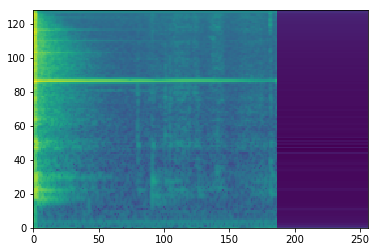

In [24]:
import matplotlib.pyplot as plt
plt.pcolormesh(np.asarray(specs_scaled[0].T))
plt.show()

In [13]:
specs = np.reshape(specs, specs.shape + (1,))
specs.shape

(4970, 256, 128, 1)

In [14]:
# input dim should be 3 but I only understand 2?
model = vgg13(specs.shape[1:], targets.shape[1])

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)

model.fit(x=specs,
          y=targets,
          batch_size=256,
          epochs=5,
          validation_split=0.2)

Train on 3976 samples, validate on 994 samples
Epoch 1/5
3976/3976 [==============================] - 2755s 693ms/step - loss: 4.6262 - acc: 0.0561 - val_loss: 8.7907 - val_acc: 0.0292
Epoch 2/5
1408/3976 [=========>....................] - ETA: 23:17 - loss: 4.3414 - acc: 0.0732

KeyboardInterrupt: 